# Setup

In [2]:
import design_tools_template as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caso de teste da função balance

In [9]:
aircraft = dt.default_aircraft()
dimensions = dt.geometry(aircraft)
nacelle = {
    'yn': 2.6,
    'zn': 0.0,
    'Ln': 4.3,
    'Dn': 1.5,
    'xn': 23.2
}
fus =  {
    'xcg': 16.4,
    'xnp': 16.9,
    'Lf': 32.8,
    'Df': 3.3
}
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
dimensions['ldg'] = aircraft['dimensions']['ldg']
aircraft['dimensions'] = dimensions
Mach_cruise = 0.77
T0_guess = 125600
gravity = 9.81
W0_guess = 43090 * gravity
altitude_cruise = 11000.0000
range_cruise = 2390000.00000
loiter_time = 2700.00000
altitude_altcruise = 4572.00000
Mach_altcruise = 0.40000000
range_altcruise = 370000.00000
weights = dt.weight(aircraft, W0_guess, T0_guess,
    altitude_cruise, Mach_cruise, range_cruise,
    loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)
aircraft['weights']['W0'] = weights[0]
aircraft['weights']['We'] = weights[1]
aircraft['weights']['Wf'] = weights[2]
aircraft['weights']['xcg_e'] = weights[4]
dt.balance(aircraft, Mach_cruise)

(16.263513159085576,
 17.274672280063154,
 16.91866207630723,
 0.17441255143621767,
 -0.02200606936677421,
 0.8489037509611113)

# Caso de teste da função landing_gear

In [10]:
xcg_fwd, xcg_aft, xnp, SM_fwd, SM_aft, b_tank_b_w = dt.balance(aircraft, Mach_cruise)
aircraft['weights']['xcg_fwd'] = xcg_fwd
aircraft['weights']['xcg_aft'] = xcg_aft
dt.landing_gear(aircraft)

(0.10820329865594537,
 0.036994909854707526,
 0.2568616211205817,
 0.1947777647825633,
 0.744618432511354)

# Função analyze

In [7]:
gravity = 9.81
W0_guess = 43090 * gravity
T0_guess : 125600
Mach_cruise = 0.77
altitude_cruise = 11000
range_cruise = 2390000.00000000000000
Mach_altcruise = 0.4
range_altcruise = 370000
altitude_altcruise = 4572
loiter_time = 2700
altitude_takeoff = 0
distance_takeoff = 1520
TO_flap_def = 0.34906585039887
TO_slat_def = 0
altitude_landing = 0
distance_landing = 1520
LD_flap_def = 0.69813170079773
LD_slat_def = 0
MLW_frac = 0.84

In [8]:
dt.analyze(aircraft, W0_guess, T0_guess,
            Mach_cruise, altitude_cruise, range_cruise,
            Mach_altcruise, range_altcruise, altitude_altcruise,
            loiter_time, altitude_takeoff, distance_takeoff, TO_flap_def, TO_slat_def,
            altitude_landing, distance_landing, LD_flap_def, LD_slat_def,
            MLW_frac)

(446026.6632100688,
 104311.79115882801,
 137867.81704572498,
 18.035411590079818,
 0.1520395500608362,
 -0.04912070218843963,
 0.8597265386338038,
 0.1022849820120917,
 0.030082994155193884,
 0.21042735861801737,
 0.1947777647825633,
 0.7413231016671977)

# Exercício

In [11]:
sweeps = np.arange(start=0, stop=45, step=0.1)*np.pi/180
vec_sm = np.zeros((2, sweeps.shape[0]))
for i in range(sweeps.shape[0]):
    aircraft = dt.default_aircraft()
    dimensions['nacelle'] = nacelle
    dimensions['fus'] = fus
    dimensions['ldg'] = aircraft['dimensions']['ldg']
    aircraft['dimensions'] = dimensions
    aircraft['geo_param']['wing']['sweep'] = sweeps[i]
    params = dt.analyze(aircraft, W0_guess, T0_guess,
                Mach_cruise, altitude_cruise, range_cruise,
                Mach_altcruise, range_altcruise, altitude_altcruise,
                loiter_time, altitude_takeoff, distance_takeoff, TO_flap_def, TO_slat_def,
                altitude_landing, distance_landing, LD_flap_def, LD_slat_def,
                MLW_frac)
    
    vec_sm[0, i] = params[5]
    vec_sm[1, i] = params[4]

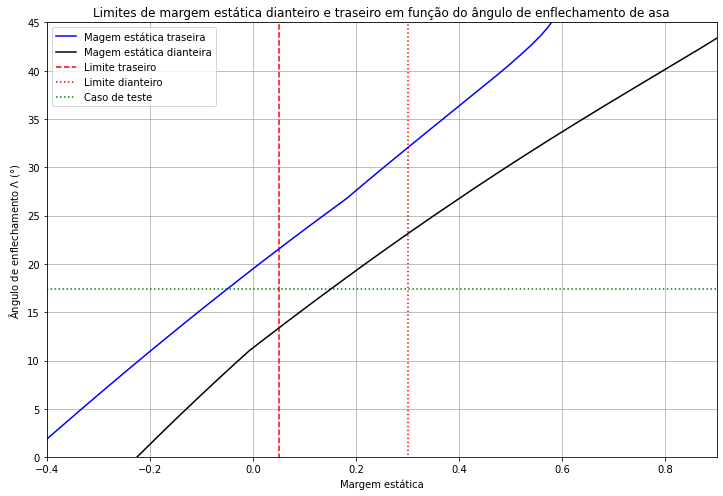

In [39]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(vec_sm[0, :], sweeps*180/np.pi, 'b', label='Magem estática traseira')
plt.plot(vec_sm[1, :], sweeps*180/np.pi, 'k', label='Magem estática dianteira')
plt.vlines(0.05, ymin=-1, ymax=50.0, colors='r', linestyles='dashed', label='Limite traseiro')
plt.vlines(0.30, ymin=-1, ymax=50.0, colors='r', linestyles='dotted', label='Limite dianteiro')
plt.hlines(17.45, xmin=-0.5, xmax=1.1, colors='g', linestyles='dotted', label='Caso de teste')
plt.ylim(0, 45)
plt.xlim(-0.4, 0.9)
plt.xlabel("Margem estática")
plt.ylabel("Ângulo de enflechamento $\Lambda$ (°)")
plt.title("Limites de margem estática dianteiro e traseiro em função do ângulo de enflechamento de asa")
plt.legend()
plt.savefig("fig2.png", dpi=200)
plt.show()

In [34]:
aircraft['weights']['per_xcg_allelse']
vec_allelse = np.arange(0.4, 0.5, 0.01)
for i in range(vec_allelse.shape[0]):
    aircraft = dt.default_aircraft()
    dimensions['nacelle'] = nacelle
    dimensions['fus'] = fus
    dimensions['ldg'] = aircraft['dimensions']['ldg']
    aircraft['dimensions'] = dimensions
    aircraft['weights']['per_xcg_allelse'] = vec_allelse[i]
    params = dt.analyze(aircraft, W0_guess, T0_guess,
                Mach_cruise, altitude_cruise, range_cruise,
                Mach_altcruise, range_altcruise, altitude_altcruise,
                loiter_time, altitude_takeoff, distance_takeoff, TO_flap_def, TO_slat_def,
                altitude_landing, distance_landing, LD_flap_def, LD_slat_def,
                MLW_frac)

    if params[5] >= 0.05 and params[4] <= 0.3:
        print(f'xcg_allelse: {vec_allelse[i]}')

xcg_allelse: 0.4
xcg_allelse: 0.41000000000000003
